In [1]:
pip install mediapipe opencv-python msvc-runtime

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mediapipe as mp
import cv2

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

# Feed from Camera and detection

In [3]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Capture Landmark and export to CSV

In [3]:
import csv
import os
import numpy as np

In [40]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [41]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [42]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [43]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [40]:
class_name = "Angry"

In [41]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Splitting into train and test

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv('coords.csv')

In [44]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Happy,0.555191,0.424818,-0.924550,0.999843,0.585117,0.366638,-0.869280,0.999716,0.601657,...,0.002308,0.0,0.622270,0.370657,0.023865,0.0,0.628124,0.363688,0.025023,0.0
1,Happy,0.553396,0.424802,-0.868458,0.999837,0.583560,0.367680,-0.815320,0.999705,0.600429,...,0.001675,0.0,0.623723,0.369771,0.023615,0.0,0.629637,0.362319,0.024811,0.0
2,Happy,0.552587,0.424805,-0.879474,0.999839,0.583082,0.368508,-0.825656,0.999709,0.600060,...,0.002018,0.0,0.620609,0.373583,0.023040,0.0,0.626578,0.366040,0.024239,0.0
3,Happy,0.552159,0.424879,-0.837364,0.999840,0.582907,0.369385,-0.785926,0.999712,0.599944,...,0.001427,0.0,0.621939,0.372805,0.022674,0.0,0.627897,0.365139,0.023871,0.0
4,Happy,0.551131,0.425109,-0.822206,0.999846,0.582344,0.370414,-0.770732,0.999722,0.599474,...,0.001440,0.0,0.622479,0.374962,0.022440,0.0,0.628533,0.367552,0.023593,0.0


In [45]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Happy,0.555191,0.424818,-0.924550,0.999843,0.585117,0.366638,-0.869280,0.999716,0.601657,...,0.002308,0.0,0.622270,0.370657,0.023865,0.0,0.628124,0.363688,0.025023,0.0
1,Happy,0.553396,0.424802,-0.868458,0.999837,0.583560,0.367680,-0.815320,0.999705,0.600429,...,0.001675,0.0,0.623723,0.369771,0.023615,0.0,0.629637,0.362319,0.024811,0.0
2,Happy,0.552587,0.424805,-0.879474,0.999839,0.583082,0.368508,-0.825656,0.999709,0.600060,...,0.002018,0.0,0.620609,0.373583,0.023040,0.0,0.626578,0.366040,0.024239,0.0
3,Happy,0.552159,0.424879,-0.837364,0.999840,0.582907,0.369385,-0.785926,0.999712,0.599944,...,0.001427,0.0,0.621939,0.372805,0.022674,0.0,0.627897,0.365139,0.023871,0.0
4,Happy,0.551131,0.425109,-0.822206,0.999846,0.582344,0.370414,-0.770732,0.999722,0.599474,...,0.001440,0.0,0.622479,0.374962,0.022440,0.0,0.628533,0.367552,0.023593,0.0


In [46]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
1368,Angry,0.579903,0.668774,-2.465075,0.998668,0.635810,0.552170,-2.503280,0.998179,0.672760,...,-0.021348,0.0,0.695645,0.523752,-0.013696,0.0,0.705855,0.511838,-0.015029,0.0
1369,Angry,0.581446,0.668836,-2.330885,0.998762,0.637546,0.552549,-2.359063,0.998293,0.674023,...,-0.021252,0.0,0.697835,0.527585,-0.012501,0.0,0.708189,0.516002,-0.013701,0.0
1370,Angry,0.581764,0.668419,-2.325972,0.998817,0.638770,0.552597,-2.358325,0.998341,0.674869,...,-0.020151,0.0,0.698332,0.526740,-0.011515,0.0,0.708654,0.515040,-0.012674,0.0
1371,Angry,0.582317,0.667054,-2.257722,0.998838,0.639631,0.551794,-2.289318,0.998347,0.675629,...,-0.019814,0.0,0.699106,0.529537,-0.010206,0.0,0.709496,0.517552,-0.011236,0.0
1372,Angry,0.582808,0.667347,-2.379858,0.998824,0.640077,0.552259,-2.412934,0.998256,0.676110,...,-0.018958,0.0,0.699814,0.529584,-0.008977,0.0,0.710270,0.517341,-0.009875,0.0


In [47]:
df[df['class']=='Sad']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
143,Sad,0.547988,0.531569,-1.317371,0.999920,0.578150,0.474134,-1.275516,0.999747,0.593993,...,-0.005057,0.0,0.634026,0.426672,0.014195,0.0,0.639209,0.420250,0.014757,0.0
144,Sad,0.552713,0.524375,-1.307510,0.999854,0.580686,0.459353,-1.245407,0.999683,0.596457,...,-0.004329,0.0,0.635699,0.435010,0.017187,0.0,0.640913,0.429342,0.017855,0.0
145,Sad,0.556677,0.518284,-1.280295,0.999832,0.584176,0.448969,-1.211141,0.999668,0.600023,...,-0.004750,0.0,0.633235,0.436921,0.016048,0.0,0.638683,0.430813,0.016734,0.0
146,Sad,0.558943,0.516369,-1.329321,0.999812,0.585916,0.444778,-1.252496,0.999651,0.601560,...,-0.005116,0.0,0.632514,0.437445,0.014858,0.0,0.638110,0.431113,0.015474,0.0
147,Sad,0.561839,0.513795,-1.331403,0.999799,0.587888,0.441973,-1.255923,0.999634,0.603336,...,-0.004717,0.0,0.632958,0.438864,0.015314,0.0,0.638533,0.432415,0.015948,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,Sad,0.635573,0.731915,-2.176198,0.999662,0.663751,0.650467,-2.156887,0.999448,0.683241,...,-0.009636,0.0,0.710049,0.635578,0.015403,0.0,0.716098,0.626077,0.016257,0.0
1184,Sad,0.637461,0.738229,-2.288253,0.999665,0.665018,0.657501,-2.263877,0.999472,0.684155,...,-0.007001,0.0,0.709015,0.637071,0.019196,0.0,0.714986,0.628352,0.020113,0.0
1185,Sad,0.638317,0.740455,-2.007548,0.999681,0.665160,0.660113,-2.002033,0.999503,0.684274,...,-0.007397,0.0,0.707996,0.638585,0.019495,0.0,0.714011,0.629591,0.020444,0.0
1186,Sad,0.638162,0.741945,-2.027364,0.999700,0.665097,0.660997,-2.024568,0.999536,0.684162,...,-0.006056,0.0,0.705988,0.637666,0.020110,0.0,0.711905,0.629314,0.020980,0.0


In [48]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [50]:
y_train

1275      Angry
851       Happy
1306      Angry
78        Happy
137       Happy
         ...   
1228      Angry
1077        Sad
1318      Angry
723     Shocked
815       Happy
Name: class, Length: 961, dtype: object

# Training and Evaluating Model

In [51]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [53]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [54]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [55]:
fit_models['rc'].predict(X_test)

array(['Angry', 'Sad', 'Happy', 'Sad', 'Sad', 'Angry', 'Angry', 'Happy',
       'Happy', 'Happy', 'Sad', 'Happy', 'Shocked', 'Angry', 'Shocked',
       'Happy', 'Angry', 'Angry', 'Angry', 'Happy', 'Sad', 'Happy',
       'Happy', 'Angry', 'Angry', 'Angry', 'Sad', 'Happy', 'Happy',
       'Happy', 'Shocked', 'Sad', 'Happy', 'Sad', 'Angry', 'Shocked',
       'Sad', 'Shocked', 'Sad', 'Angry', 'Shocked', 'Angry', 'Angry',
       'Angry', 'Sad', 'Happy', 'Sad', 'Shocked', 'Sad', 'Happy', 'Angry',
       'Shocked', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad',
       'Angry', 'Angry', 'Sad', 'Happy', 'Shocked', 'Sad', 'Sad', 'Sad',
       'Angry', 'Angry', 'Angry', 'Happy', 'Sad', 'Angry', 'Happy',
       'Angry', 'Sad', 'Sad', 'Shocked', 'Sad', 'Happy', 'Sad', 'Happy',
       'Sad', 'Angry', 'Angry', 'Happy', 'Sad', 'Angry', 'Sad', 'Happy',
       'Angry', 'Angry', 'Sad', 'Angry', 'Angry', 'Happy', 'Sad', 'Angry',
       'Angry', 'Angry', 'Sad', 'Angry', 'Sad', 'Sad', 'Angry', 'Shocked',


In [56]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [57]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9927184466019418
rc 0.9878640776699029
rf 0.9927184466019418
gb 0.9902912621359223


In [58]:
fit_models['rf'].predict(X_test)

array(['Angry', 'Sad', 'Happy', 'Sad', 'Sad', 'Angry', 'Angry', 'Happy',
       'Happy', 'Happy', 'Sad', 'Happy', 'Shocked', 'Angry', 'Shocked',
       'Happy', 'Angry', 'Angry', 'Angry', 'Happy', 'Sad', 'Happy',
       'Happy', 'Angry', 'Angry', 'Angry', 'Sad', 'Happy', 'Happy',
       'Happy', 'Shocked', 'Sad', 'Happy', 'Sad', 'Angry', 'Shocked',
       'Sad', 'Shocked', 'Sad', 'Angry', 'Shocked', 'Angry', 'Angry',
       'Angry', 'Sad', 'Happy', 'Sad', 'Shocked', 'Sad', 'Happy', 'Angry',
       'Shocked', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad',
       'Angry', 'Angry', 'Sad', 'Happy', 'Shocked', 'Sad', 'Sad', 'Sad',
       'Angry', 'Angry', 'Angry', 'Happy', 'Sad', 'Angry', 'Happy',
       'Angry', 'Sad', 'Sad', 'Shocked', 'Sad', 'Happy', 'Sad', 'Happy',
       'Sad', 'Angry', 'Angry', 'Happy', 'Sad', 'Angry', 'Sad', 'Happy',
       'Angry', 'Angry', 'Sad', 'Angry', 'Angry', 'Happy', 'Sad', 'Angry',
       'Angry', 'Angry', 'Sad', 'Angry', 'Sad', 'Sad', 'Angry', 'Shocked',


In [59]:
y_test

1336    Angry
375       Sad
768     Happy
1085      Sad
1048      Sad
        ...  
1091      Sad
261       Sad
319       Sad
71      Happy
456     Angry
Name: class, Length: 412, dtype: object

In [60]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# Make Detections

In [61]:
import pickle
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [62]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [28]:
type(body_language_class.split(' ')[0])

str

In [79]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
emotions=[]
writer= cv2.VideoWriter('basicvideo.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
        
        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 

            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            emotions += [body_language_class.split(' ')[0]]
            
            writer.write(frame)
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
writer.release()
cv2.destroyAllWindows()

C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Angry [0.36 0.36 0.15 0.13]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Angry [0.41 0.3  0.12 0.17]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Angry [0.47 0.25 0.14 0.14]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Angry [0.43 0.28 0.16 0.13]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.38 0.4  0.15 0.07]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.41 0.05 0.53 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.42 0.04 0.54 0.  ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.61 0.26 0.08]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.61 0.19 0.14]
Happy 

C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.05 0.63 0.2  0.12]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.13 0.39 0.26 0.22]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.13 0.43 0.25 0.19]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.1  0.43 0.26 0.21]
Happy [0.12 0.42 0.28 0.18]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.5  0.24 0.02]
Happy [0.37 0.55 0.08 0.  ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid f

Happy [0.08 0.64 0.19 0.09]
Happy [0.1  0.52 0.28 0.1 ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.07 0.78 0.12 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.11 0.57 0.27 0.05]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.02 0.82 0.13 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.03 0.78 0.14 0.05]
Happy [0.03 0.73 0.14 0.1 ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.02 0.78 0.17 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.03 0.54 0.28 0.15]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.08 0.46 0.43 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.13 0.67 0.18 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.11 0.7  0.15 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.13 0.52 0.3  0.05]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.65 0.28 0.03]
Happy [0.02 0.8  0.13 0.05]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.03 0.65 0.28 0.04]
Happy [0.04 0.72 0.21 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.19 0.46 0.31 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.2  0.42 0.35 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.2  0.37 0.38 0.05]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.24 0.35 0.37 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.17 0.41 0.31 0.11]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.16 0.38 0.34 0.12]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.16 0.38 0.35 0.11]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.18 0.33 0.37 0.12]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.26 0.37 0.29 0.08]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.09 0.58 0.3  0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.09 0.59 0.19 0.13]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.57 0.2  0.17]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.6  0.2  0.14]
Happy [0.03 0.76 0.2  0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.03 0.78 0.17 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.01 0.81 0.16 0.02]
Happy [0.02 0.78 0.17 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.02 0.81 0.14 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.78 0.15 0.03]
Happy [0.04 0.79 0.13 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.74 0.16 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.75 0.16 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.78 0.15 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.79 0.14 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.78 0.14 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.03 0.8  0.14 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.81 0.12 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.75 0.17 0.03]
Happy [0.04 0.79 0.14 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.8  0.13 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.8  0.13 0.03]
Happy [0.05 0.78 0.15 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.66 0.24 0.05]
Happy [0.05 0.64 0.26 0.05]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.68 0.24 0.03]
Happy [0.04 0.78 0.15 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.7  0.21 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.05 0.71 0.2  0.04]
Happy [0.08 0.63 0.21 0.08]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.08 0.59 0.21 0.12]
Happy [0.05 0.71 0.19 0.05]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.7  0.2  0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.7  0.2  0.04]
Happy [0.08 0.59 0.25 0.08]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.07 0.62 0.24 0.07]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.09 0.57 0.23 0.11]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.09 0.62 0.23 0.06]
Happy [0.08 0.59 0.26 0.07]
Happy [0.05 0.68 0.23 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid f

Happy [0.07 0.62 0.24 0.07]
Happy [0.09 0.6  0.24 0.07]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.68 0.2  0.06]
Happy [0.06 0.68 0.18 0.08]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.7  0.18 0.06]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.06 0.71 0.16 0.07]
Happy [0.05 0.69 0.17 0.09]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.07 0.68 0.17 0.08]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.04 0.73 0.19 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.1  0.47 0.31 0.12]
Sad [0.13 0.37 0.48 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.29 0.41 0.26 0.04]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.29 0.47 0.21 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.28 0.44 0.28 0.  ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.32 0.42 0.26 0.  ]
Happy [0.29 0.43 0.28 0.  ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.48 0.26 0.02]
Happy [0.24 0.49 0.25 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.25 0.47 0.26 0.02]
Happy

C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 [0.21 0.5  0.27 0.02]
Happy [0.21 0.46 0.31 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.19 0.51 0.28 0.02]
Happy [0.19 0.49 0.3  0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.19 0.49 0.3  0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.17 0.52 0.29 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.18 0.53 0.27 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.2  0.47 0.32 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.19 0.48 0.32 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.21 0.44 0.34 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.22 0.41 0.36 0.01]
Happy [0.23 0.41 0.35 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.28 0.34 0.37 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.26 0.35 0.39 0.  ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.27 0.33 0.39 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sad [0.26 0.32 0.41 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.21 0.43 0.35 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.23 0.43 0.33 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.39 0.36 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.22 0.43 0.34 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.43 0.32 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.23 0.4  0.36 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.2  0.44 0.34 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.28 0.38 0.31 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.38 0.38 0.  ]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.45 0.29 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.23 0.46 0.29 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.23 0.43 0.31 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.44 0.3  0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.43 0.31 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.22 0.44 0.31 0.03]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.24 0.43 0.32 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.25 0.42 0.31 0.02]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.25 0.42 0.32 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.25 0.41 0.33 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.26 0.42 0.31 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.23 0.41 0.35 0.01]


C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sangh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Happy [0.25 0.42 0.31 0.02]


Counter({'Angry': 109, 'Happy': 23, 'Sad': 4})


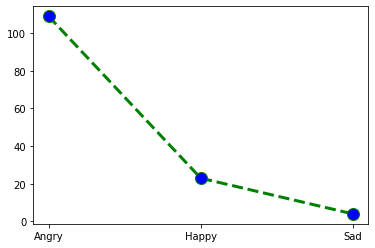

In [78]:
from collections import Counter
import matplotlib.pyplot as plt
frequency = Counter(emotions)
xa=[]
ya=[]
print(frequency)
for string, frequency in frequency.items():
    xa += [string]
    ya.append(frequency)

plt.plot(xa, ya, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  

In [1]:
import customtkinter as ctk
import tkinter.messagebox as tkmb
import cv2
from PIL import Image, ImageTk
  
# Selecting GUI theme - dark, light , system (for system default)
ctk.set_appearance_mode("dark")
  
# Selecting color theme - blue, green, dark-blue
ctk.set_default_color_theme("blue")
  
app = ctk.CTk()
app.geometry("400x400")
app.title("Modern Login UI using Customtkinter")
  
def process_frames():
    _, frame = cap.read()
    # Perform any necessary image processing or analysis on the frame
    # ...

    # Display the processed frame in the GUI
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    photo = ImageTk.PhotoImage(image=Image.fromarray(image))
    video_label.config(image=photo)
    video_label.image = photo

    # Call this function again after a delay to process the next frame
    window.after(10, process_frames)

# Function to start video recording
def start_recording():
    global is_recording, out
    if not is_recording:
        is_recording = True
        out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (640, 480))

# Function to stop video recording
def stop_recording():
    global is_recording, out
    if is_recording:
        is_recording = False
        out.release()

def video():
    video_app=ctk.CTk()
    video_app.geometry("400x400")
    video_app.title("Recording page")
    vlabel = ctk.CTkLabel(app,text="This is the main recording page")
    label.pack(pady=20)
    vframe = ctk.CTkFrame(master=video_app)
    vframe.pack(pady=20,padx=40,fill='both',expand=True)
    vlabel = ctk.CTkLabel(master=vframe,text="Main recording page")
    vlabel.pack(pady=12,padx=10)
    record_button = ctk.CTkButton(master=vframe, text="Start Recording",command=start_recording)
    record_button.pack(pady=12,padx=10)
    stop_button = ctk.CTkButton(master=vframe, text="Stop Recording",command=stop_recording)
    stop_button.pack(pady=12,padx=10)
    cap = cv2.VideoCapture(0)
    is_recording = False
    out = None
    # Start processing video frames
    _, frame = cap.read()
    # Perform any necessary image processing or analysis on the frame
    # ...

    # Display the processed frame in the GUI
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    photo = ImageTk.PhotoImage(image=Image.fromarray(image))
    vlabel.configure(image=photo)
    vlabel.image = photo

    # Call this function again after a delay to process the next frame
    video_app.after(10, process_frames)
    cap.release
    video_app.mainloop()

def login():
  
    username = "Geeks"
    password = "12345"
    new_window = ctk.CTkToplevel(app)
  
    new_window.title("New Window")
  
    new_window.geometry("350x150")
  
    if user_entry.get() == username and user_pass.get() == password:
        tkmb.showinfo(title="Login Successful",message="You have logged in Successfully")
        video()
    elif user_entry.get() == username and user_pass.get() != password:
        tkmb.showwarning(title='Wrong password',message='Please check your password')
    elif user_entry.get() != username and user_pass.get() == password:
        tkmb.showwarning(title='Wrong username',message='Please check your username')
    else:
        tkmb.showerror(title="Login Failed",message="Invalid Username and password")
  
  
  
label = ctk.CTkLabel(app,text="This is the main UI page")
  
label.pack(pady=20)
  
  
frame = ctk.CTkFrame(master=app)
frame.pack(pady=20,padx=40,fill='both',expand=True)
  
label = ctk.CTkLabel(master=frame,text='Modern Login System UI')
label.pack(pady=12,padx=10)
  
  
user_entry= ctk.CTkEntry(master=frame,placeholder_text="Username")
user_entry.pack(pady=12,padx=10)
  
user_pass= ctk.CTkEntry(master=frame,placeholder_text="Password",show="*")
user_pass.pack(pady=12,padx=10)
  
  
button = ctk.CTkButton(master=frame,text='Login',command=login)
button.pack(pady=12,padx=10)
  
  
  
app.mainloop()

C:\Users\sangh\anaconda3\lib\site-packages\customtkinter\windows\widgets\core_widget_classes\ctk_base_class.py:179: UserWarning: CTkLabel Warning: Given image is not CTkImage but <class 'PIL.ImageTk.PhotoImage'>. Image can not be scaled on HighDPI displays, use CTkImage instead.

  warnings.warn(f"{type(self).__name__} Warning: Given image is not CTkImage but {type(image)}. Image can not be scaled on HighDPI displays, use CTkImage instead.\n")
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sangh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\sangh\anaconda3\lib\site-packages\customtkinter\windows\widgets\ctk_button.py", line 553, in _clicked
    self._command()
  File "C:\Users\sangh\AppData\Local\Temp\ipykernel_26736\218148285.py", line 89, in login
    video()
  File "C:\Users\sangh\AppData\Local\Temp\ipykernel_26736\218148285.py", line 69, in video
    vlabel.configure(image=photo)
  File "C:

KeyboardInterrupt: 